### b) 

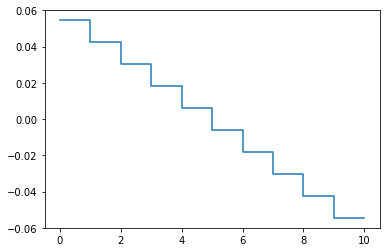

In [44]:
import numpy as np
import matplotlib.pyplot as plt
from numpy.linalg import inv
from numpy.linalg import matrix_power as mpow

def get_v_from_force(forces):
    steps = 500
    vs = []
    v = 0
    vs.append(v)
    for f in forces:
        v_start = v
        v_end = v + f
        for i in range(steps):
            w = float(i) / steps
            v = (1.0 - w) * v_start + w * v_end
            vs.append(v)
        v = v_end
        vs.append(v)
    vs = np.array(vs)
    return np.array(vs)

def get_x_from_v(vels):
    xs = []
    dx = 10.0 / len(vels)
    for i in range(len(vels)):
        xs.append(np.trapz(vels[:i], dx=dx))
    return np.array(xs)
        
A = np.array([[1, 1], [0, 1]])
b = np.array([0.5, 1.0])
u_list = []

for i in range(1, 11):
    u_list.append(np.matmul(mpow(A, 10 - i), b))

U = np.array(u_list).T
X = np.array([1.0, 0.0])
sym_inv = inv(np.matmul(U, U.T))
p = np.matmul(U.T, np.matmul(sym_inv, X))

# Plot forces.
forces = p
t = np.arange(0, 11, 1)
plt.step(t, np.append(forces, forces[-1]), where='post', label='forces')
plt.show()

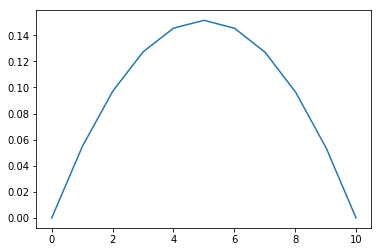

In [42]:
# Plot velocities.
vels = get_v_from_force(forces)
plt.plot(np.linspace(0, 10, len(vels)), vels)
plt.show()

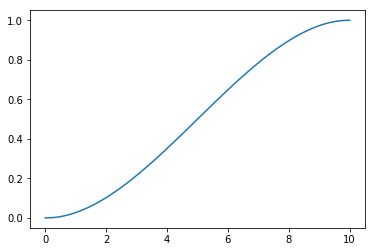

In [41]:
# Plot displacements.
disps = get_x_from_v(vels)
plt.plot(np.linspace(0, 10, len(disps)), disps)
plt.show()

### Explanations for plots for b):

As the problem requirement is that the mass should be motionless at the point $x = 0$, intuitively there will be forces pushing to the right at the beginning, and then to the left at the end (to cancel out the accumulated velocities). These relationships should intuitively be symmetric around the halfway point (t = 5).

### c)

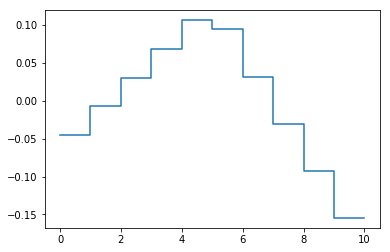

In [51]:
# Values for part c). 
w_list = []

for i in range(1, 6):
    w_list.append(np.matmul(mpow(A, 5 - i), b))

z = np.array(w_list)[:, 0]
new_row = np.concatenate([z, np.zeros(5)])
U_bar = np.vstack([U, new_row])
sym_inv = inv(np.matmul(U_bar, U_bar.T))
X_bar = np.append(X, 0)
p = np.matmul(U_bar.T, np.matmul(sym_inv, X_bar))

# Plot forces.
forces = p
t = np.arange(0, 11, 1)
plt.step(t, np.append(forces, forces[-1]), where='post', label='forces')
plt.show()

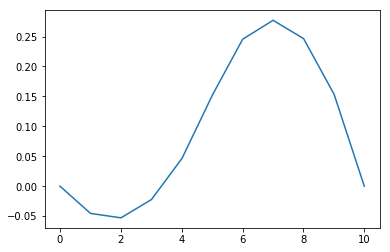

In [52]:
# Plot velocities.
vels = get_v_from_force(forces)
plt.plot(np.linspace(0, 10, len(vels)), vels)
plt.show()

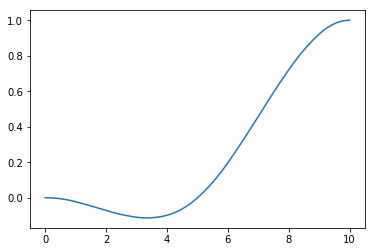

In [53]:
# Plot displacements.
disps = get_x_from_v(vels)
plt.plot(np.linspace(0, 10, len(disps)), disps)
plt.show()

### Explanations for plots for c):

The problem has the additional requirement that the mass be at position 0 at $t = 5$. Intuitively, we should start by moving to the left a bit, and then by the time the mass is again at the origin, we are moving to the right (this way there is already momentum, i.e we are on our way to $x = 1$). 

Alternatively, we can choose to not do anything _until_ $t = 5$, but this requires more force (both to the left and right) in the latter 5 seconds. Intuitively, this approach will have a larger $f_max$ than the plots shown above, which results in a larger $l_2$ norm for the force values.